### Student Information
Name: 黃羽繪

Student ID: 113030507

GitHub ID: yuhuimee

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### ----- 引入必要套件 -----###
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 0. 讀檔與 data info

In [3]:
# 讀取 CSV 檔案，並以 DataFrame 格式呈現
import pandas as pd

df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")

df

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [4]:
# 檢查各欄位多有少缺失值:只有 "downvotes" 和 "upvote_ratio" 兩個欄位各自缺少 847-64=783 個值
df.info()
#df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [5]:
# 觀察各數值型欄位 (Dtype=float64) 的分布情況
df.describe()

,upvotes,downvotes,upvote_ratio,subjectivity,polarity,sentiment,label
count,847.000000,64.000000,64.000000,847.000000,847.000000,847.000000,847.000000
mean,12.262102,0.265625,0.981406,0.346768,0.036116,0.144038,-0.243211
std,142.126337,1.461052,0.068147,0.317261,0.297814,0.767566,0.664801
min,-74.000000,0.000000,0.500000,0.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.366667,0.000000,0.000000,0.000000
75%,4.000000,0.000000,1.000000,0.577500,0.150000,1.000000,0.000000
max,3943.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1. Data Preprocessing - Over View
    - 觀察各欄位 與 "label" 的關聯性，並以視覺化圖表呈現，並決定是否選用該欄位作為後續分析

### 1.1 以下欄位與本次分析較無關聯，可忽略 :
    - "datetime"、"post_id"、"author"、"url"、"entities"


### 1.2 數值型欄位以 Boxplot 進行分析:
    - "upvotes" : 中位數接近 0，不同 label 間的差異不大，說明 upvotes 和情緒正負關係不強，不選用。
    - "downvotes" : 幾乎所有值都在 0 附近，且缺失值太多，不選用。
    - "upvote_ratio" : 可看出 upvote_ratio >0.8 的 label 不是 0 就是 1，但考量到所有非 null 的 upvote_ratio 資料中只有小於 25% 的值不是 1，且缺失值太多，不選用。
    - "subjectivity" : label -1 與 1 的 subjectivity 中位數都偏高，0 （中立）的 subjectivity 明顯更低，和 label 有合理關聯，選用。
    - "polarity" : -1 主要集中在負值區間、0 集中在 0 附近、1 有更多正值分布，和 label 的定義吻合，選用。

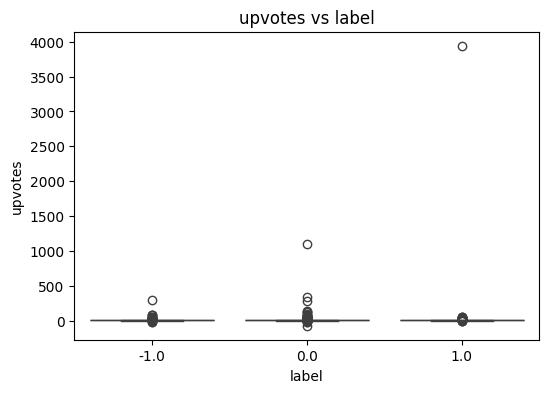

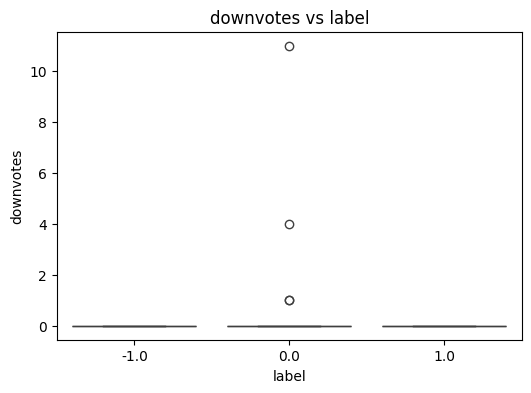

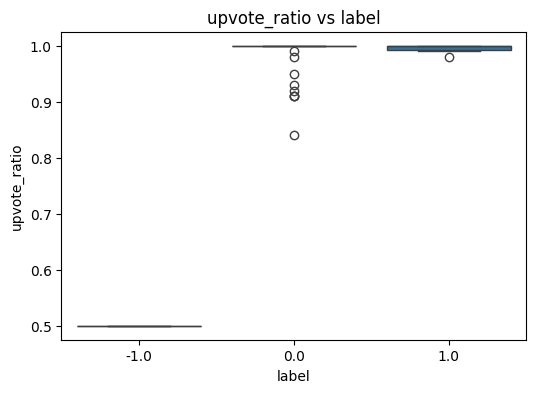

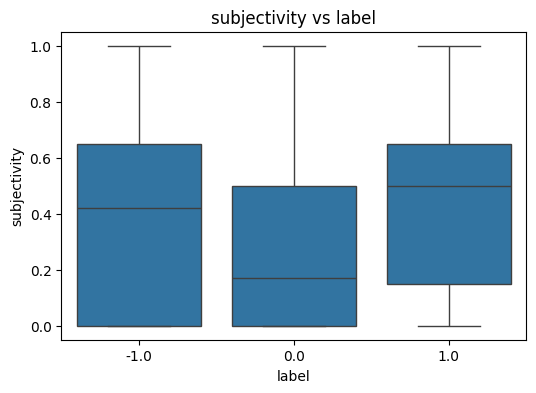

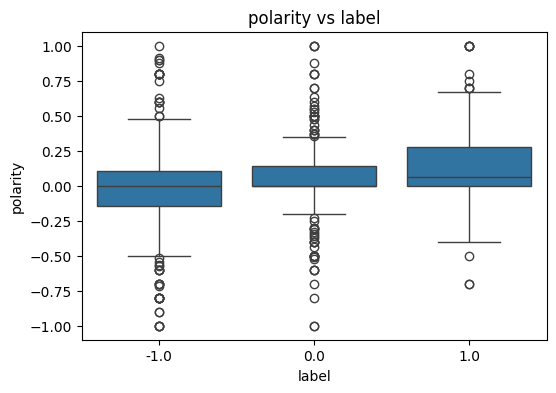

In [6]:
# 數值型欄位以 Boxplot 進行分析: "upvotes", "downvotes", "upvote_ratio", "subjectivity", "polarity" 

import seaborn as sns
import matplotlib.pyplot as plt

features = ["upvotes", "downvotes", "upvote_ratio", "subjectivity", "polarity"]

for col in features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x="label", y=col, data=df)
        plt.title(f"{col} vs label")
        plt.show()

### 1.3 類別型資料以 Bar plot 分析
    - "type": 整體分布不平衡，comment 壓倒性多，不選用。
    - "subreddit": stockstobuytoday 偏向中立/正向，StockMarket 與 stocks 有較多負向，不同類別 subreddit 在有不同分布情況，可能存在潛在關聯，選用。

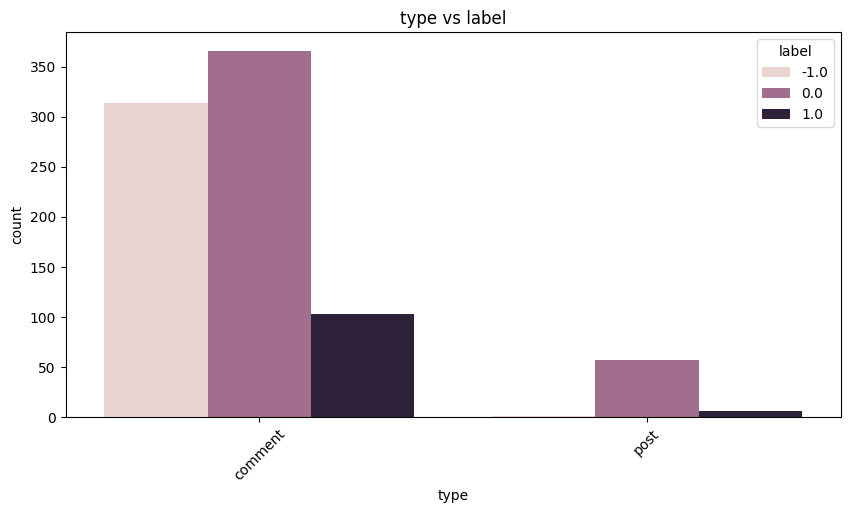

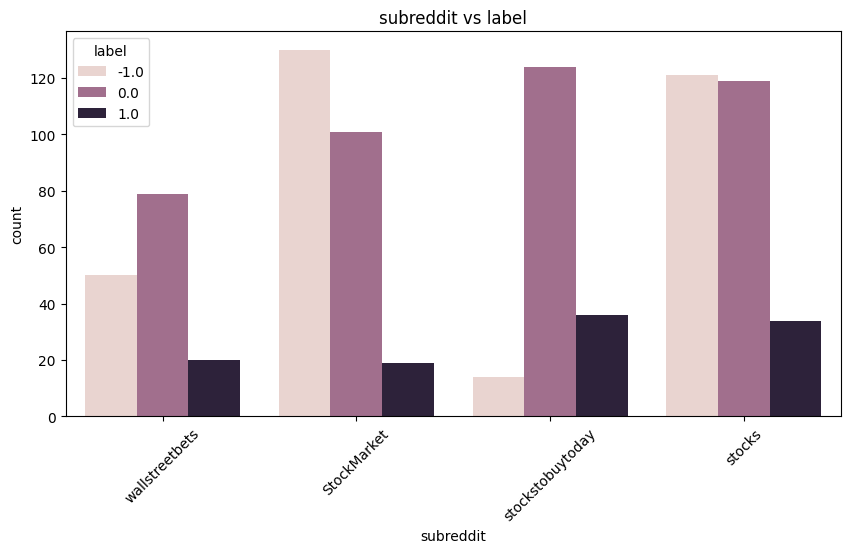

In [7]:
# 2. 類別型資料以 Bar plot 分析:"type", "subreddit"

features_class = ["type", "subreddit"]

for col in features_class:
    if col in df.columns:
        plt.figure(figsize=(10,5))
        sns.countplot(x=col, hue="label", data=df)
        plt.title(f"{col} vs label")
        plt.xticks(rotation=45)
        plt.show()

### 1.4 文字型欄位以 heat map 與 bar plot 進行分析 

1.4.1 分析 "text" 與 "label" 的關聯性

In [8]:
# 擷取必要欄位並檢視
text_cols=["text","label"]
df_text = df[text_cols]

df_text

,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0
...,...,...
842,Invest now it is going to shoot up tomorrow,1.0
843,Where can I read this?,0.0
844,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0
845,i sold my puts so i expect cheeto to declare w...,-1.0


In [9]:
### ----- 將 text 轉換成 token 的形式 ----- ###
df_text["tokens"] = df_text["text"].astype(str).str.split(" ")
df_text.head()

C:\Users\user\AppData\Local\Temp\ipykernel_16272\2917504811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["tokens"] = df_text["text"].astype(str).str.split(" ")


,text,label,tokens
0,Calls on retards,-1.0,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,"[Seeing, lots, of, red, in, the, ticker.]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,He didn’t say thank you.,-1.0,"[He, didn’t, say, thank, you.]"


In [10]:
### ----- 將 text 內容向量化，並瀏覽詞彙表相關資訊 ------ ### 
from sklearn.feature_extraction.text import CountVectorizer

# 用 CountVectorizer 建立「詞-計數」矩陣
vectorizer = CountVectorizer()  
X_counts = vectorizer.fit_transform(df_text["text"].astype(str))

print("- 詞彙表大小:", len(vectorizer.get_feature_names_out()))
print("- 所有詞彙:", vectorizer.get_feature_names_out())
print("- 詞彙表大小:", len(vectorizer.get_feature_names_out()))

print("- 印出第 500 份文件的文字向量與值:\n",X_counts[500])

- 詞彙表大小: 4346
- 所有詞彙: ['00' '000' '01378' ... 'zgld' 'zone' 'zsil']
- 詞彙表大小: 4346
- 印出第 500 份文件的文字向量與值:
   (np.int32(0), np.int32(3858))	1
  (np.int32(0), np.int32(175))	2
  (np.int32(0), np.int32(3848))	4
  (np.int32(0), np.int32(2149))	2
  (np.int32(0), np.int32(3866))	1
  (np.int32(0), np.int32(1604))	1
  (np.int32(0), np.int32(374))	1
  (np.int32(0), np.int32(675))	1
  (np.int32(0), np.int32(3095))	2
  (np.int32(0), np.int32(3652))	1
  (np.int32(0), np.int32(4224))	1
  (np.int32(0), np.int32(4322))	1
  (np.int32(0), np.int32(2374))	1
  (np.int32(0), np.int32(2424))	2
  (np.int32(0), np.int32(1808))	1
  (np.int32(0), np.int32(1415))	2
  (np.int32(0), np.int32(3843))	1
  (np.int32(0), np.int32(583))	2
  (np.int32(0), np.int32(3796))	2
  (np.int32(0), np.int32(1284))	1


In [11]:
### ----- 製作詞頻表 ----- ###
text_df = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())
text_df

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


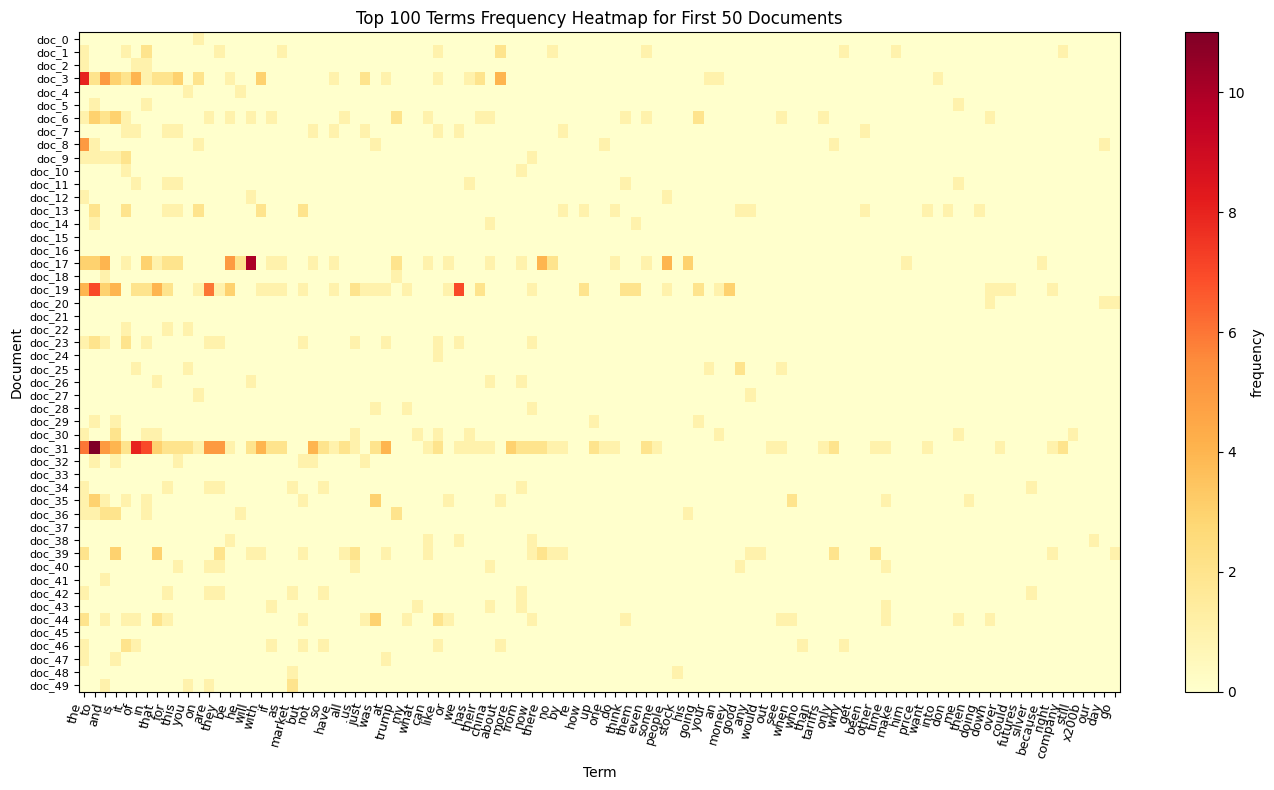

In [12]:
### --- 製作熱點圖呈現 term 在各文件中的出現頻率 ----- ###

# 前面已用 CountVectorizer 建立「詞→計數」矩陣
# vectorizer = CountVectorizer()  
# X_counts = vectorizer.fit_transform(df_text["text"].astype(str))

terms = vectorizer.get_feature_names_out()

# 找出全語料中出現次數前 100 名的詞 
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()             # 每個詞在全集合的出現次數
top_k = 100
top_idx = np.argsort(term_freq)[::-1][:top_k]             # 由大到小取前100
top_terms = terms[top_idx]

# 取前 50 份文件 × 前 100 常見詞 的子矩陣
n_docs_show = min(50, X_counts.shape[0])
submat = X_counts[:n_docs_show, :][:, top_idx].toarray()         # (50, 100)

# 繪圖
plt.figure(figsize=(14, 8))
im = plt.imshow(submat, aspect="auto", cmap="YlOrRd")  # cmap="YlOrRd" 改成淺色
plt.colorbar(im, label="frequency")
plt.title(f"Top {top_k} Terms Frequency Heatmap for First {n_docs_show} Documents")
plt.xlabel("Term")
plt.ylabel("Document")

# X 軸放 term 
step = max(1, len(top_terms)//100)  # 顯示 100 個刻度
plt.xticks(ticks=np.arange(0, len(top_terms), step),
           labels=top_terms[::step], rotation=75, ha="right", fontsize=9)

# Y 軸放文件編號
plt.yticks(ticks=np.arange(n_docs_show),
           labels=[f"doc_{i}" for i in range(n_docs_show)], fontsize=8)

plt.tight_layout()
plt.show()

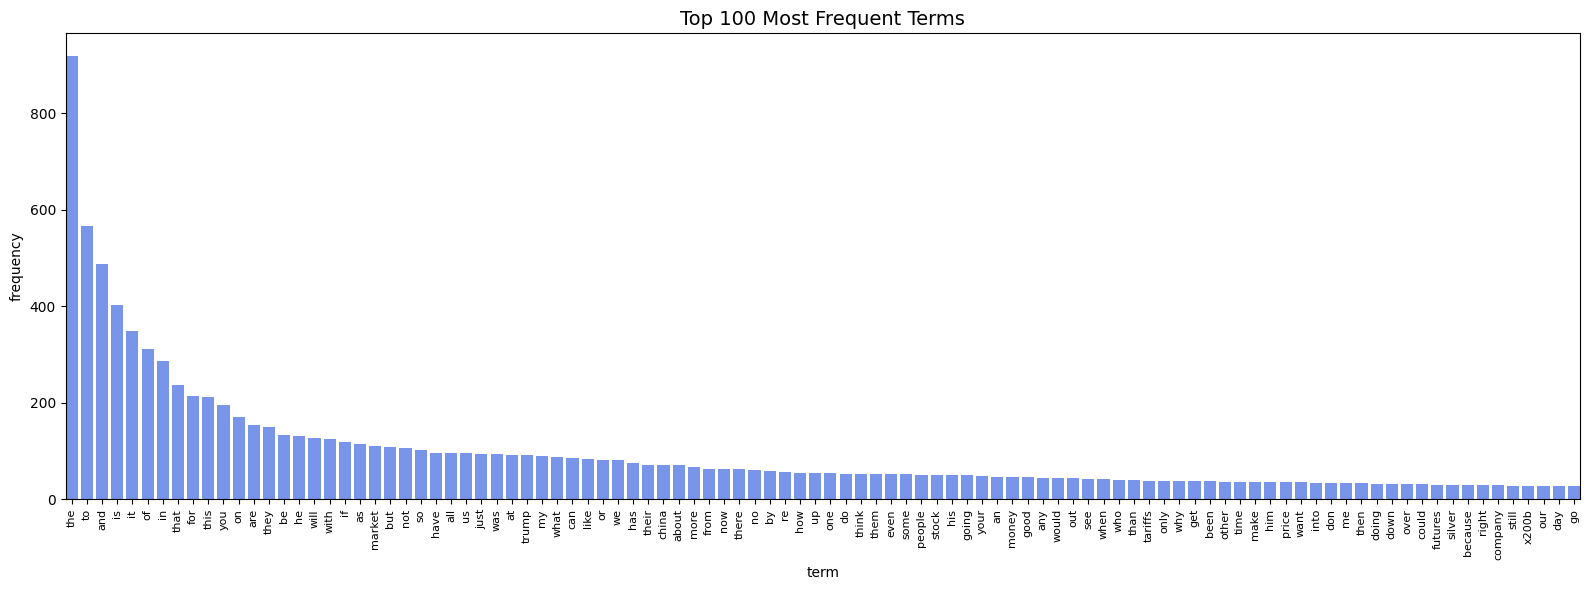

In [13]:
# 取出前 100 常見的詞並統計其出現頻率
top_k = 100
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()
top_idx = np.argsort(term_freq)[::-1][:top_k]
top_terms = terms[top_idx]
top_counts = term_freq[top_idx]

# 建成 DataFrame
freq_df = pd.DataFrame({"term": top_terms, "frequency": top_counts})

# 繪製 bar plot 
plt.figure(figsize=(16, 6))
plt.margins(x=0)
plt.bar(freq_df["term"], freq_df["frequency"], color="royalblue", alpha=0.7)
plt.xticks(rotation=90, fontsize=8)
plt.title(f"Top {top_k} Most Frequent Terms", fontsize=14)
plt.xlabel("term")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

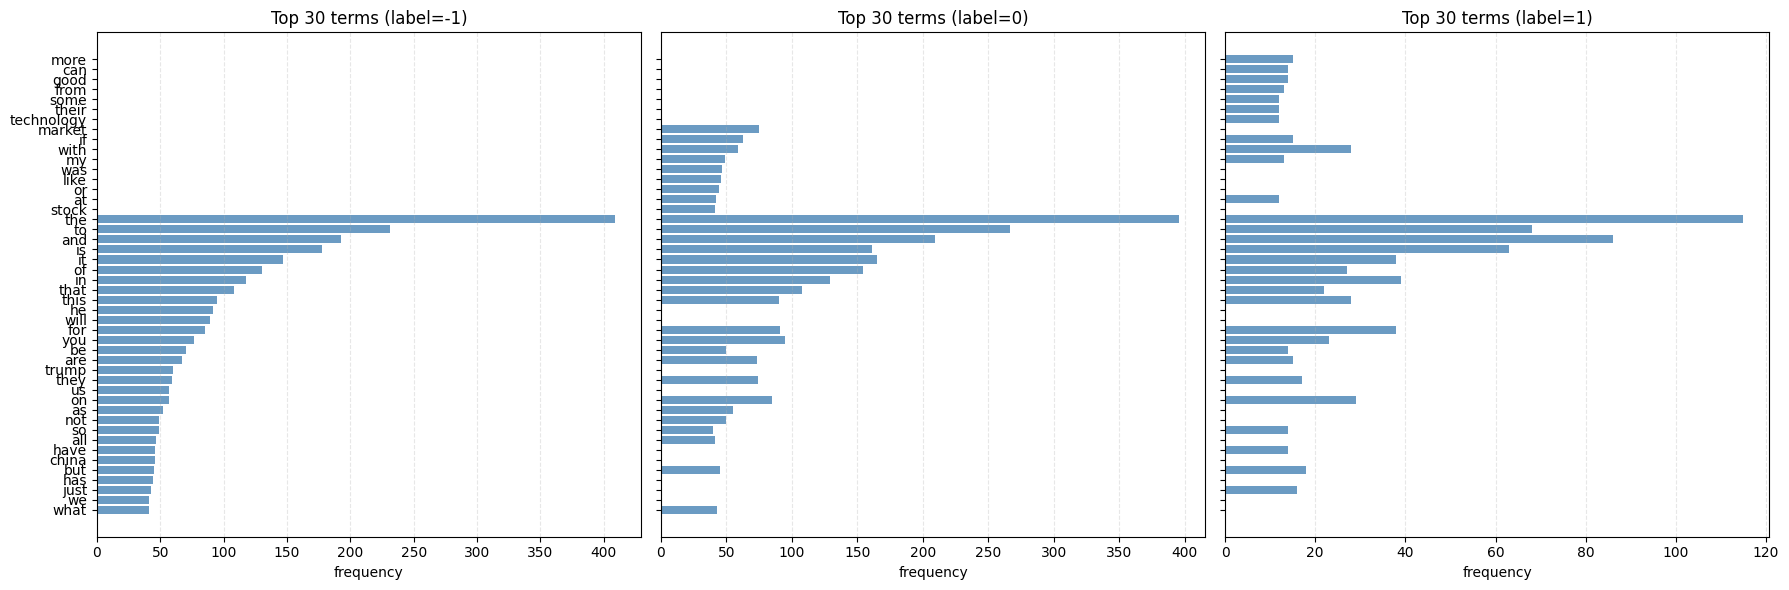

In [14]:
### ----- 比較前 k 個常見的 term 中，出現在 "label" = 1, 0, -1 的 doc 頻率 ----- ###

# 計算各 label 下的詞頻
labels = df_text["label"].values
label_values = sorted(pd.Series(labels).unique())   # [-1.0, 0.0, 1.0]
per_label_counts = {}
for l in label_values:
    rows = (labels == l)
    per_label_counts[l] = np.asarray(X_counts[rows].sum(axis=0)).ravel()

# 針對每個 label 取 Top-N
TOPN = 30
fig, axes = plt.subplots(1, len(label_values), figsize=(18, 6), sharey=True)

for ax, l in zip(axes, label_values):
    counts = per_label_counts[l]
    top_idx = np.argsort(counts)[::-1][:TOPN]
    top_terms = terms[top_idx]
    top_counts = counts[top_idx]

    # 讓可讀性更好：水平條圖 + 由小到大畫（條從下到上遞增）
    order = np.argsort(top_counts)
    ax.barh(top_terms[order], top_counts[order], color="steelblue", alpha=0.8)
    ax.set_title(f"Top {TOPN} terms (label={int(l)})")
    ax.set_xlabel("frequency")
    ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


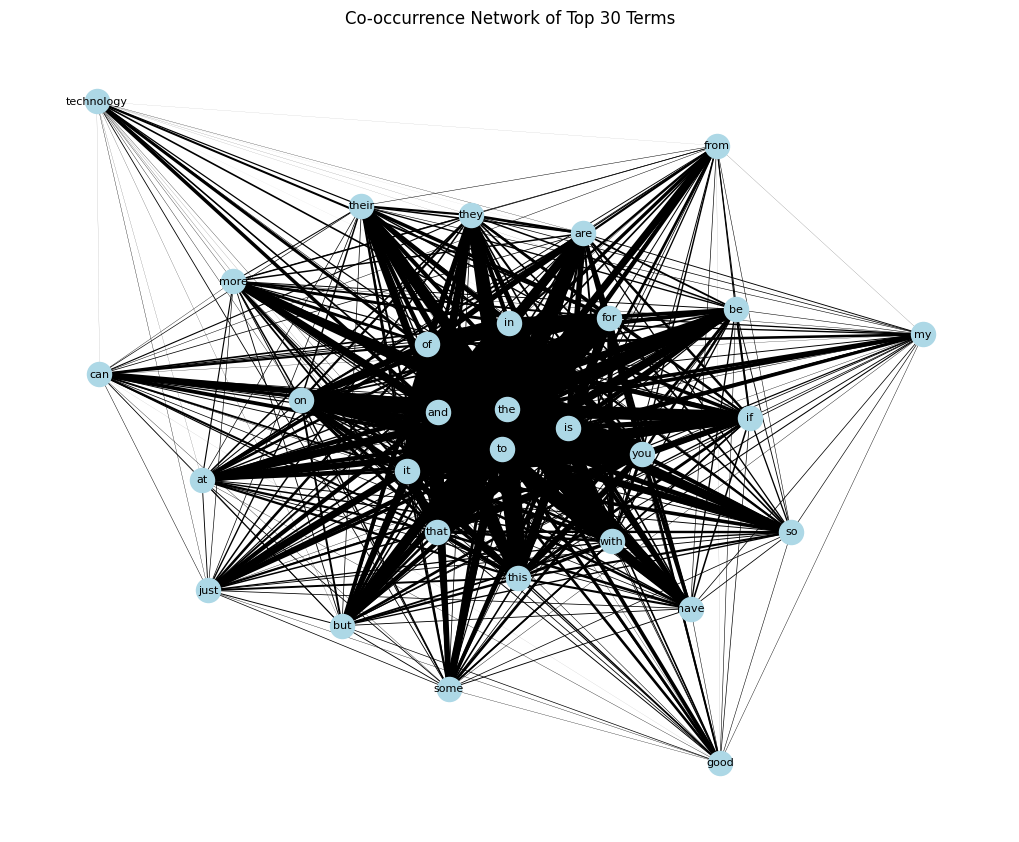

In [15]:
### ----- 其他可視化工具 (1):前 30 常見的詞彙關聯圖(連線顏色越深表示同時出現在同一份文件裡的次數越多) ----- ###
import networkx as nx
from itertools import combinations

# 簡單共現矩陣（同文件出現）
co_matrix = (X_counts.T @ X_counts).toarray()
np.fill_diagonal(co_matrix, 0)

# 取前 30 詞，建立圖
top_n = 30
co_top = co_matrix[top_idx[:top_n], :][:, top_idx[:top_n]]
G = nx.Graph()

for i in range(top_n):
    for j in range(i+1, top_n):
        if co_top[i, j] > 0:
            G.add_edge(top_terms[i], top_terms[j], weight=co_top[i, j])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_size=8,
        width=[d['weight']/50 for (_,_,d) in G.edges(data=True)])
plt.title("Co-occurrence Network of Top 30 Terms")
plt.show()


In [16]:
!pip install wordcloud


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [17]:
### ----- 其他可視化工具 (2) : 文字雲，將出現頻率較高的文字放大呈現在雲中 (套件下載問題尚未解決) ----- ###
# from wordcloud import WordCloud

# word_freq = dict(zip(terms[top_idx], term_freq[top_idx]))
# wc = WordCloud(width=800, height=400, background_color="white", colormap="inferno")
# wc.generate_from_frequencies(word_freq)

# plt.figure(figsize=(12, 6))
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.title("Word Cloud of Top Terms")
# plt.show()


1.4.2 分析 "title" 與 "label" 的關聯性

In [18]:
title_cols=["title","label"]
df_title = df[title_cols]

df_title

,title,label
0,Retardation is on the menu boys! WSB is so back,-1.0
1,Retail giant TARGET has now declined for 10 co...,0.0
2,How do you feel about a sitting president maki...,0.0
3,Who knows more? $VMAR,1.0
4,The Trump administration is begging Xi Jinping...,-1.0
...,...,...
842,$MRIN Marin Software killed it today. Hope som...,1.0
843,$ U.S. dollar value (crashing),0.0
844,Analyst Recommendations,0.0
845,Weekend Discussion Thread for the Weekend of A...,-1.0


In [19]:
### ----- 將 title 內容向量化，並瀏覽詞彙表相關資訊 ------ ### 
from sklearn.feature_extraction.text import CountVectorizer

# 用 CountVectorizer 建立「詞-計數」矩陣
vectorizer = CountVectorizer()  
X_counts = vectorizer.fit_transform(df_title["title"].astype(str))

print("- 詞彙表大小:", len(vectorizer.get_feature_names_out()))
print("- 所有詞彙:", vectorizer.get_feature_names_out())
print("- 詞彙表大小:", len(vectorizer.get_feature_names_out()))

print("- 印出第 500 份文件的文字向量與值:\n",X_counts[500]) # 所有 doc 中每一個 term 的 (向量, 字詞出現頻率)

- 詞彙表大小: 601
- 所有詞彙: ['000' '04' '08' '10' '100k' '10k' '11' '12' '125' '14' '145' '16' '18'
 '1952' '20' '2008' '2014' '2022' '2025' '22' '234' '250' '300' '34' '350'
 '415m' '43' '50' '75k' 'aal' 'about' 'acceleration' 'acquisition'
 'administration' 'advantage' 'advantages' 'advice' 'advisors' 'aerospace'
 'after' 'ahro' 'ai' 'airo' 'aka' 'all' 'allies' 'alternus' 'amc' 'an'
 'analysis' 'analyst' 'and' 'anix' 'announces' 'another' 'any' 'anybody'
 'anyone' 'apls' 'apr' 'april' 'are' 'artw' 'as' 'asked' 'assets' 'at'
 'atlx' 'atus' 'authority' 'auy' 'available' 'avoiding' 'awful' 'back'
 'bagger' 'ballistc' 'bbig' 'be' 'been' 'begging' 'being' 'best' 'bets'
 'big' 'bitcoin' 'bkkt' 'blackrock' 'blown' 'bnzi' 'bond' 'boys'
 'breaking' 'bridging' 'bullish' 'bunch' 'busy' 'buy' 'buyback' 'buying'
 'by' 'call' 'campaign' 'cancer' 'caps' 'cash' 'cel' 'chair' 'cheap'
 'check' 'china' 'citadel' 'clean' 'climb' 'close' 'clov' 'clvs' 'cn'
 'coinbase' 'com' 'commitment' 'company' 'complete' 'co

In [20]:
### ----- 製作詞頻表 ----- ###
title_df = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())
title_df

,000,04,08,10,100k,10k,11,12,125,14,...,xrtx,yamana,year,yield,yields,yolo,yoshitsu,you,your,ytd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


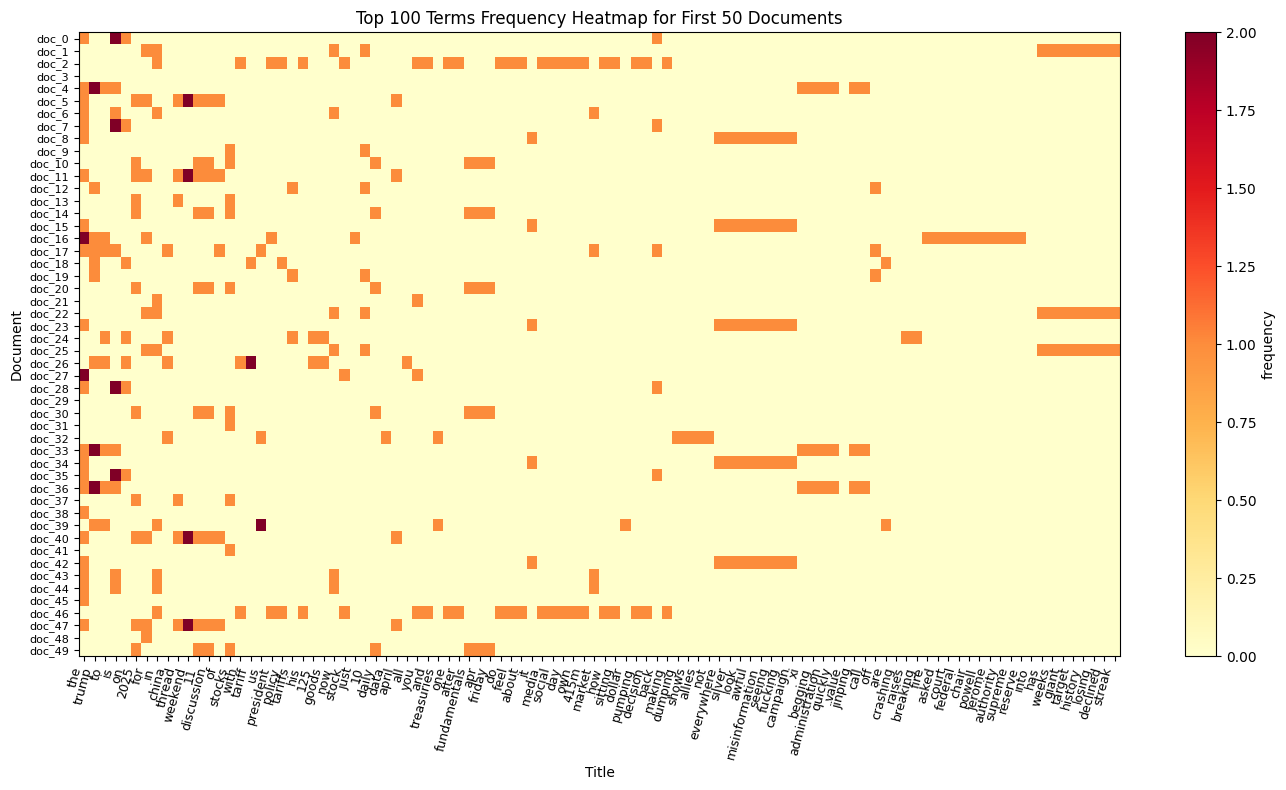

In [21]:
### ----- 以熱點圖分析前 k 常見的 term 在前 m 份文件中出現的頻率情況 ----- ###
terms = vectorizer.get_feature_names_out()

# 找出全語料中出現次數前 100 名的詞 
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()             # 每個詞在全集合的出現次數
top_k = 100
top_idx = np.argsort(term_freq)[::-1][:top_k]             # 由大到小取前100
top_terms = terms[top_idx]

# 取前 50 份文件 × 前 100 常見詞 的子矩陣
n_docs_show = min(50, X_counts.shape[0])
submat = X_counts[:n_docs_show, :][:, top_idx].toarray()         # (50, 100)

# 繪圖
plt.figure(figsize=(14, 8))
im = plt.imshow(submat, aspect="auto", cmap="YlOrRd")  # cmap="YlOrRd" 改成淺色
plt.colorbar(im, label="frequency")
plt.title(f"Top {top_k} Terms Frequency Heatmap for First {n_docs_show} Documents")
plt.xlabel("Title")
plt.ylabel("Document")

# X 軸放 term 
step = max(1, len(top_terms)//100)  # 顯示 100 個刻度
plt.xticks(ticks=np.arange(0, len(top_terms), step),
           labels=top_terms[::step], rotation=75, ha="right", fontsize=9)

# Y 軸放文件編號
plt.yticks(ticks=np.arange(n_docs_show),
           labels=[f"doc_{i}" for i in range(n_docs_show)], fontsize=8)

plt.tight_layout()
plt.show()

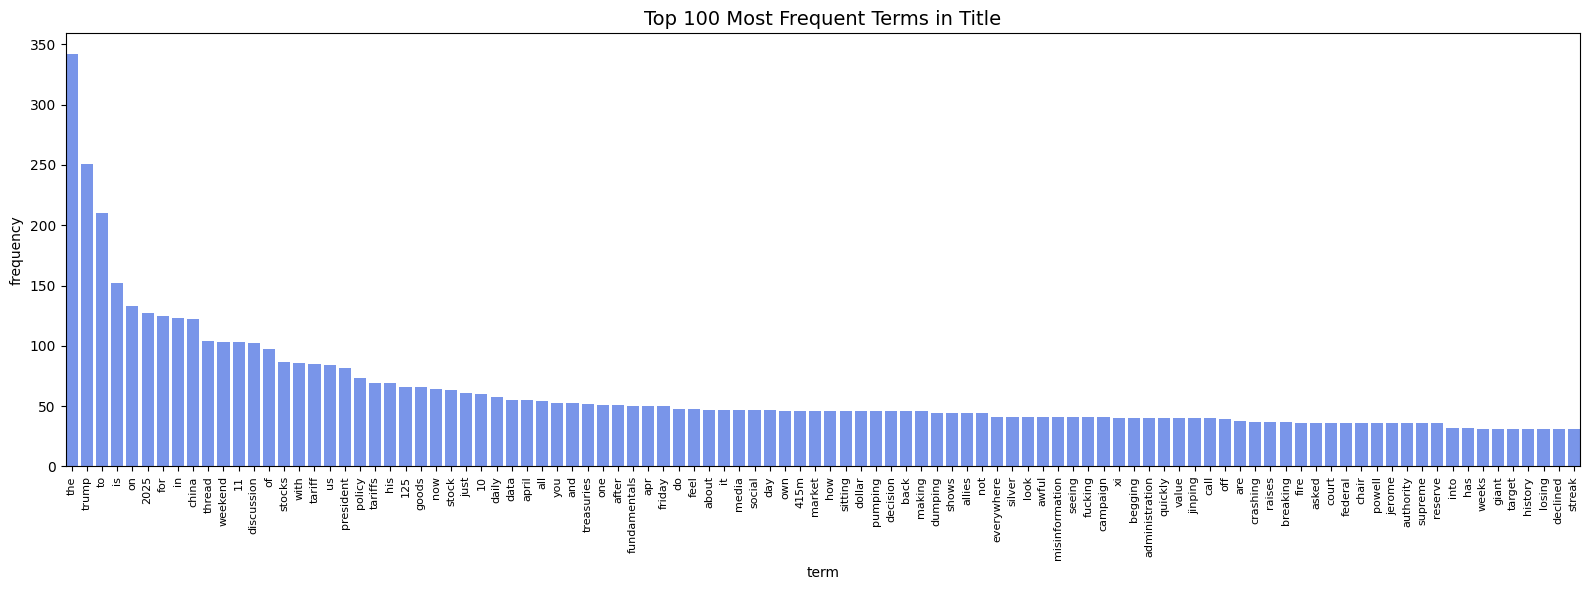

In [22]:
### ----- 取出前 100 常見的詞並統計其出現頻率 ----- ###
top_k = 100
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()
top_idx = np.argsort(term_freq)[::-1][:top_k]
top_terms = terms[top_idx]
top_counts = term_freq[top_idx]

# 建成 DataFrame
freq_df = pd.DataFrame({"term": top_terms, "frequency": top_counts})

# 繪製 bar plot 
plt.figure(figsize=(16, 6))
plt.margins(x=0)
plt.bar(freq_df["term"], freq_df["frequency"], color="royalblue", alpha=0.7)
plt.xticks(rotation=90, fontsize=8)
plt.title(f"Top {top_k} Most Frequent Terms in Title", fontsize=14)
plt.xlabel("term")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

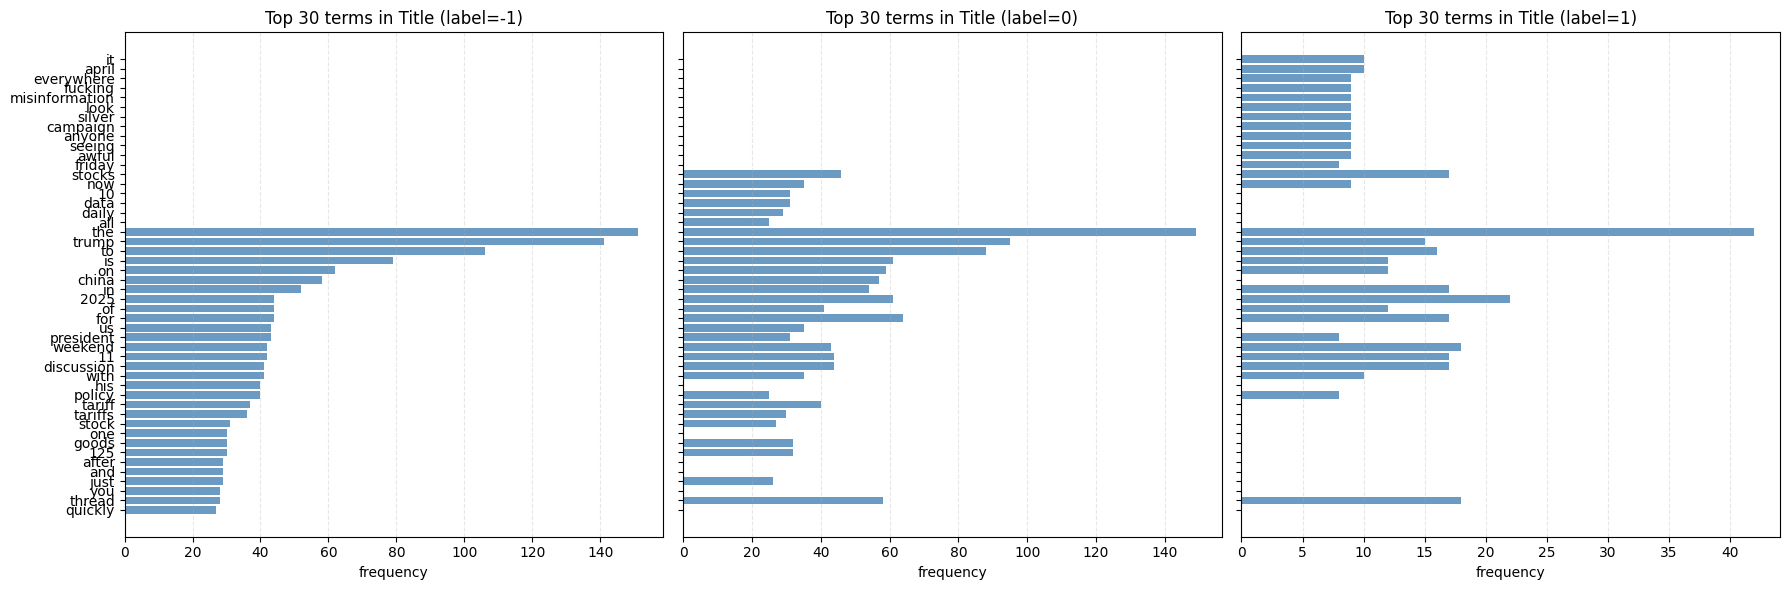

In [23]:
### ----- 比較前 k 個常見的 term 中，出現在 "label" = 1, 0, -1 的 doc 頻率 ----- ###

# 計算各 label 下的詞頻
labels = df_text["label"].values
label_values = sorted(pd.Series(labels).unique())   # [-1.0, 0.0, 1.0]
per_label_counts = {}
for l in label_values:
    rows = (labels == l)
    per_label_counts[l] = np.asarray(X_counts[rows].sum(axis=0)).ravel()

# 針對每個 label 取 Top-N
TOPN = 30
fig, axes = plt.subplots(1, len(label_values), figsize=(18, 6), sharey=True)

for ax, l in zip(axes, label_values):
    counts = per_label_counts[l]
    top_idx = np.argsort(counts)[::-1][:TOPN]
    top_terms = terms[top_idx]
    top_counts = counts[top_idx]

    # 讓可讀性更好：水平條圖 + 由小到大畫（條從下到上遞增）
    order = np.argsort(top_counts)
    ax.barh(top_terms[order], top_counts[order], color="steelblue", alpha=0.8)
    ax.set_title(f"Top {TOPN} terms in Title (label={int(l)})")
    ax.set_xlabel("frequency")
    ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


### phase 1 ends.

# Phase 2

## 2. Data Preproccessing - Text Data

- 針對 "text" 欄位進一步分析

In [24]:
df_text

,text,label,tokens
0,Calls on retards,-1.0,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,"[Seeing, lots, of, red, in, the, ticker.]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,He didn’t say thank you.,-1.0,"[He, didn’t, say, thank, you.]"
...,...,...,...
842,Invest now it is going to shoot up tomorrow,1.0,"[Invest, now, it, is, going, to, shoot, up, to..."
843,Where can I read this?,0.0,"[Where, can, I, read, this?]"
844,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,"[Upgrades,, Downgrades\r\n\r\n, [Stock, Analys..."
845,i sold my puts so i expect cheeto to declare w...,-1.0,"[i, sold, my, puts, so, i, expect, cheeto, to,..."


In [25]:
df_text['tokens']

0                                   [Calls, on, retards]
1      [Stunt, as, in, like, why, did, they, even, ma...
2              [Seeing, lots, of, red, in, the, ticker.]
3      [Vision, Marine, Technologies, Inc., is, rewri...
4                         [He, didn’t, say, thank, you.]
                             ...                        
842    [Invest, now, it, is, going, to, shoot, up, to...
843                         [Where, can, I, read, this?]
844    [Upgrades,, Downgrades\r\n\r\n, [Stock, Analys...
845    [i, sold, my, puts, so, i, expect, cheeto, to,...
846                       [![img](emote|t5_2th52|31224)]
Name: tokens, Length: 847, dtype: object

### 2.1 Finding frequent patterns

In [26]:
### Begin Assignment Here

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df_text['label'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df_text[df_text['label'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

filt_term_document_dfs

{np.float64(-1.0):      000  02  03  10  100  1000  10000  11  12  13  ...  years  yet  yields  \
 0      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
 1      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
 2      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
 3      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
 4      0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
 ..   ...  ..  ..  ..  ...   ...    ...  ..  ..  ..  ...    ...  ...     ...   
 310    0   1   1   0    0     0      0   0   0   1  ...      0    0       0   
 311    0   0   0   0    0     0      0   0   0   0  ...      1    0       0   
 312    0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
 313    0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
 314    0   0   0   0    0     0      0   0   0   0  ...      0    0       0   
 
      yippee  yo  yo

In [27]:
# categories[0]、categories[1]、categories[2] 代表 label=-1, 0, 1
print(f"Filtered Term-Document Frequency DataFrame for Label = {categories[0]}:")
filt_term_document_dfs[categories[0]]

Filtered Term-Document Frequency DataFrame for Label = -1.0:


,000,02,03,10,100,1000,10000,11,12,13,...,years,yet,yields,yippee,yo,you,your,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
print(f"Filtered Term-Document Frequency DataFrame for Label = {categories[0]}:")
filt_term_document_dfs[categories[1]]

Filtered Term-Document Frequency DataFrame for Label = -1.0:


,00,000,01378,027,08,10,100,100k,100x,10k,...,you,young,your,yours,yourself,yoyo,yup,zgld,zone,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


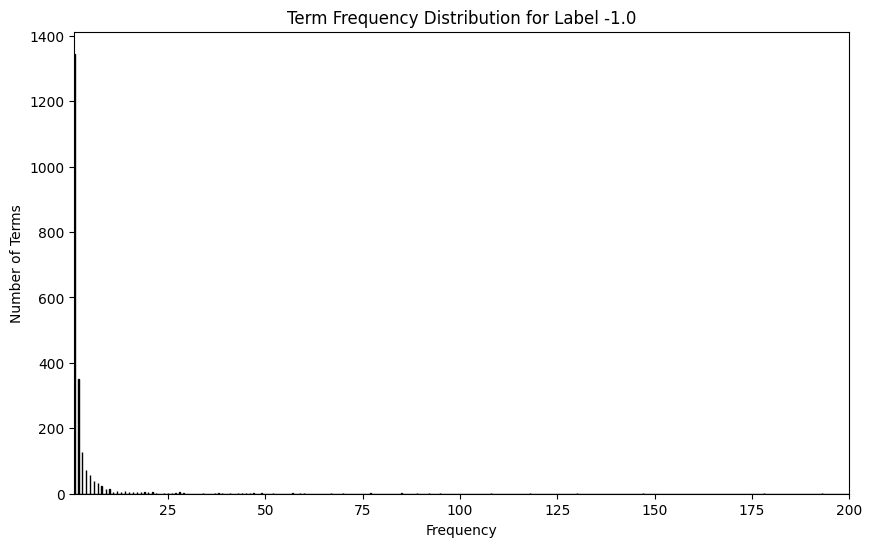

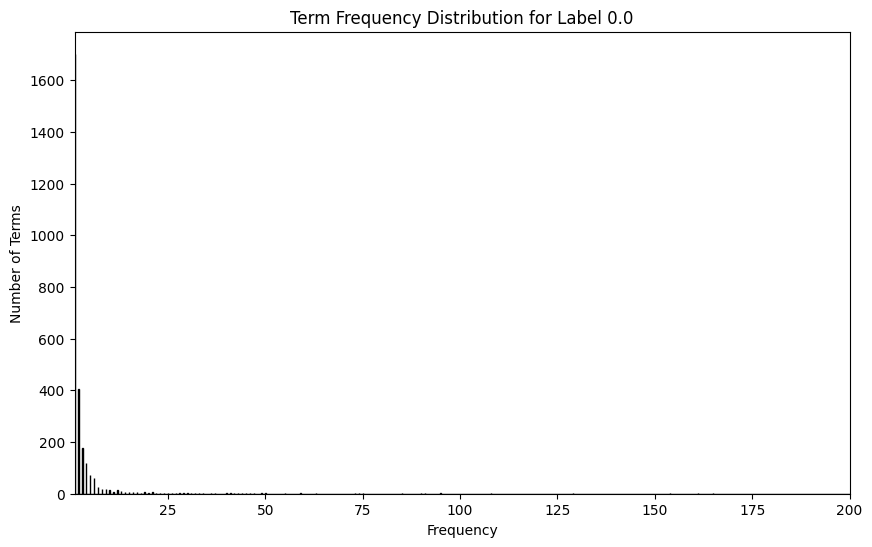

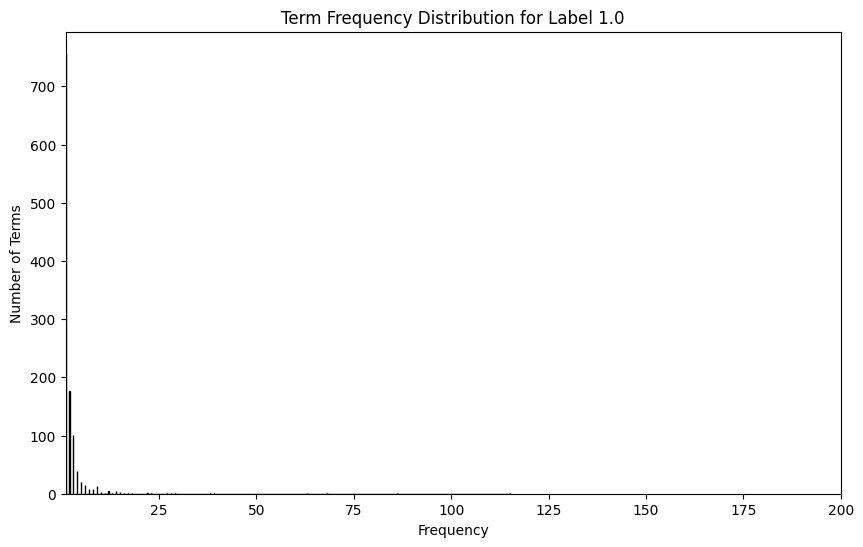

In [29]:
 # Sum over all documents to get total frequency for each word
category_number=[0,1,2]
for i in  category_number:
    word_counts = filt_term_document_dfs[categories[i]].sum(axis=0).to_numpy()
    
    # Visualize the frequency distribution
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
    plt.title(f'Term Frequency Distribution for Label {categories[i]}')
    plt.xlabel('Frequency')
    plt.ylabel('Number of Terms')
    plt.xlim(1, 200)
    plt.show()

### 2.2 刪掉各 label 中 top ５% 跟 bottom １% 的 term

In [30]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

for category_number in range(3):
    print(f"Label: {categories[category_number]}")
    print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
    print(f"Filtered terms: {filtered_words}")
    print('---------------------')


Label: -1.0
Number of terms in bottom 1%: 21
Filtered terms: ['200', '200k', '2011', '2021', '2025', 'ya', 'yea', 'yields', '1934', '1947', '1953', '1961', '1969', '1973', '1974', '1999', 'woefully', 'woke', '150', '16', '160']
---------------------
Label: 0.0
Number of terms in bottom 1%: 21
Filtered terms: ['200', '200k', '2011', '2021', '2025', 'ya', 'yea', 'yields', '1934', '1947', '1953', '1961', '1969', '1973', '1974', '1999', 'woefully', 'woke', '150', '16', '160']
---------------------
Label: 1.0
Number of terms in bottom 1%: 21
Filtered terms: ['200', '200k', '2011', '2021', '2025', 'ya', 'yea', 'yields', '1934', '1947', '1953', '1961', '1969', '1973', '1974', '1999', 'woefully', 'woke', '150', '16', '160']
---------------------


In [31]:
#category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor label={category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])


For label=-1.0 we filter the following words:
Bottom 1.0% words: 
200         1
200k        1
2011        1
2021        1
2025        1
ya          1
yea         1
yields      1
1934        1
1947        1
1953        1
1961        1
1969        1
1973        1
1974        1
1999        1
woefully    1
woke        1
150         1
16          1
160         1
dtype: int64
Top 5.0% words: 
these         11
after         11
literally     12
me            12
shit          12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For label=0.0 we filter the following words:
Bottom 1.0% words: 
betrayals      1
winners        1
wins           1
winter         1
wipe           1
pop            1
wish           1
wit            1
pool           1
within         1
politicians    1
wm             1
wms            1
woke           1
harris         1
women          1
policies       1
legit          1
poised         1
justifi

### 2.3 創建三個 label 的 transactional dataset 並視覺化分析

In [32]:
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

In [33]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = str(category).replace('.', '_')

    #category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

========= td_freq_db_-1_0.csv ==========
Database size (total no of transactions) : 315
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.815873015873017
Maximum Transaction Size : 132
Standard Deviation Transaction Size : 13.153950536399085
Variance in Transaction Sizes : 173.5774542513396
Sparsity : 0.994269702708112


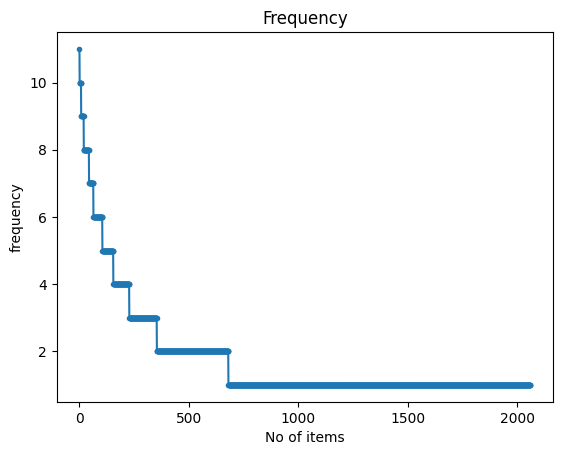

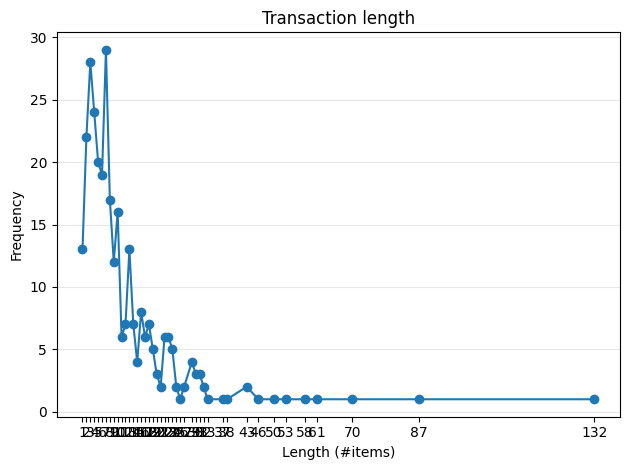

========= td_freq_db_0_0.csv ==========
Database size (total no of transactions) : 416
Number of items : 2586
Minimum Transaction Size : 1
Average Transaction Size : 10.79326923076923
Maximum Transaction Size : 199
Standard Deviation Transaction Size : 18.214020193790894
Variance in Transaction Sizes : 332.54993049119554
Sparsity : 0.9958262686655958


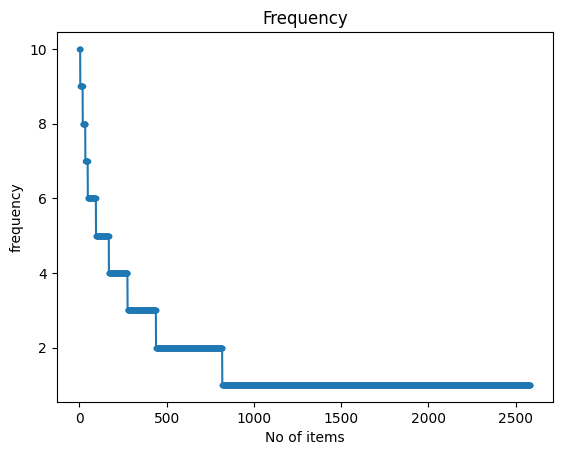

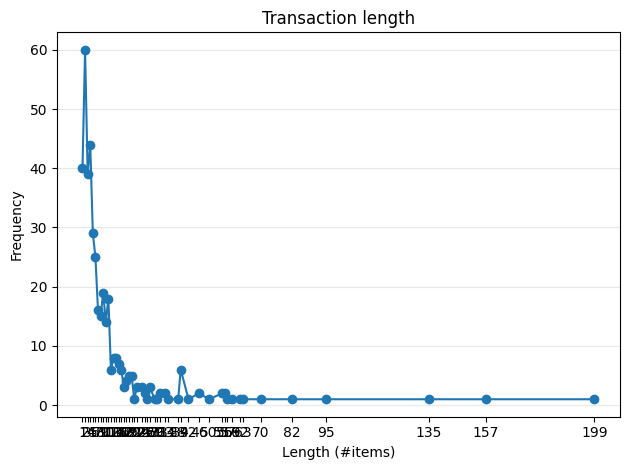

========= td_freq_db_1_0.csv ==========
Database size (total no of transactions) : 108
Number of items : 1103
Minimum Transaction Size : 1
Average Transaction Size : 14.342592592592593
Maximum Transaction Size : 92
Standard Deviation Transaction Size : 16.82159218530856
Variance in Transaction Sizes : 285.61050536517826
Sparsity : 0.9869967428897619


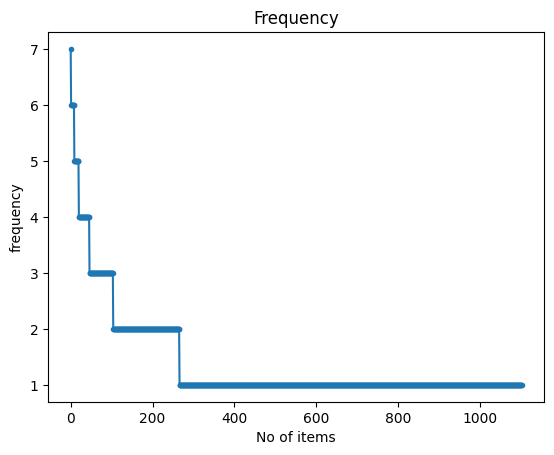

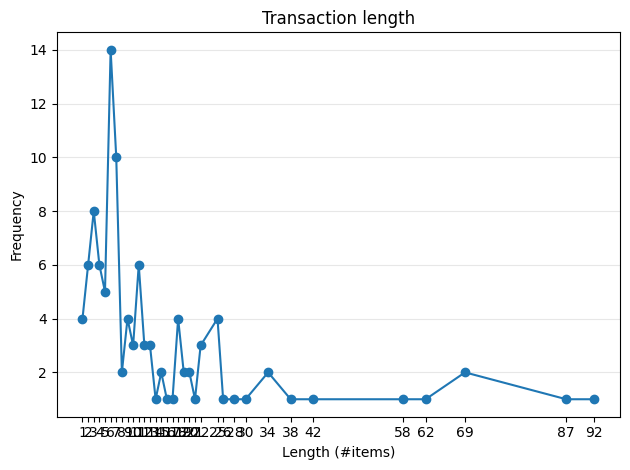

In [34]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

td_freq_db = ['td_freq_db_-1_0.csv', 'td_freq_db_0_0.csv', 'td_freq_db_1_0.csv']

for i in range(3):
    print(f'========= {td_freq_db[i]} ==========')
    obj = tds.TransactionalDatabase(td_freq_db[i])
    obj.run()
    obj.printStats()
    obj.plotGraphs()

### 2.4 使用 FPGrowth (minSup=3) 篩選出較高頻出現的 term 與組合

In [35]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=3
obj1 = alg.FPGrowth(iFile='td_freq_db_-1_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_minus1 = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_minus1))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_label_-1_minSup3.txt') #save the patterns
frequentPatternsDF_minus1

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 399
Runtime: 0.013234376907348633


,Patterns,Support
0,personally,3
1,starting,3
2,honestly,3
3,exactly,3
4,square,3
...,...,...
394,sure,10
395,should,10
396,bad,10
397,again,10


- 為各 label 創建 minSup=3 的資料表 

In [36]:
minSup=3
obj1 = alg.FPGrowth(iFile='td_freq_db_1_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_1 = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_1))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_label_1_minSup3.txt') #save the patterns
frequentPatternsDF_1

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 112
Runtime: 0.0


,Patterns,Support
0,come,3
1,electric,3
2,ll,3
3,main,3
4,making,3
...,...,...
107,out,6
108,see,6
109,economy,6
110,way,6


In [37]:
minSup=3
obj1 = alg.FPGrowth(iFile='td_freq_db_1_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_0 = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_0))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_label_0_minSup3.txt') #save the patterns
frequentPatternsDF_0

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 112
Runtime: 0.012982606887817383


,Patterns,Support
0,come,3
1,electric,3
2,ll,3
3,main,3
4,making,3
...,...,...
107,out,6
108,see,6
109,economy,6
110,way,6


In [38]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_minus1, frequentPatternsDF_0, frequentPatternsDF_1]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

          Patterns  Support
360        already       11
359          again       10
358           sure       10
356         things       10
348            off        9
..             ...      ...
3          exactly        3
357  here\talready        3
2         honestly        3
1         starting        3
0       personally        3

[361 rows x 2 columns]
Number of patterns discarded: 262


### 2.5 創建 augmented_df

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(df_text['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df_text['tokenized_text'] = df_text['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df_text.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df_text['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df_text.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

C:\Users\user\AppData\Local\Temp\ipykernel_16272\3168380411.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['tokenized_text'] = df_text['text'].str.split().apply(set)


,00,000,01378,02,027,03,06,08,10,100,...,buy\tsell,need\talready,need\tamericans,nothing\tright,thing\tsupport,exactly,here\talready,honestly,starting,personally
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.6 使用 PCA, t-SNE, and UMAP 對 augment_df 進行 Dimensionality Reduction 並視覺化

- 二維

In [40]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

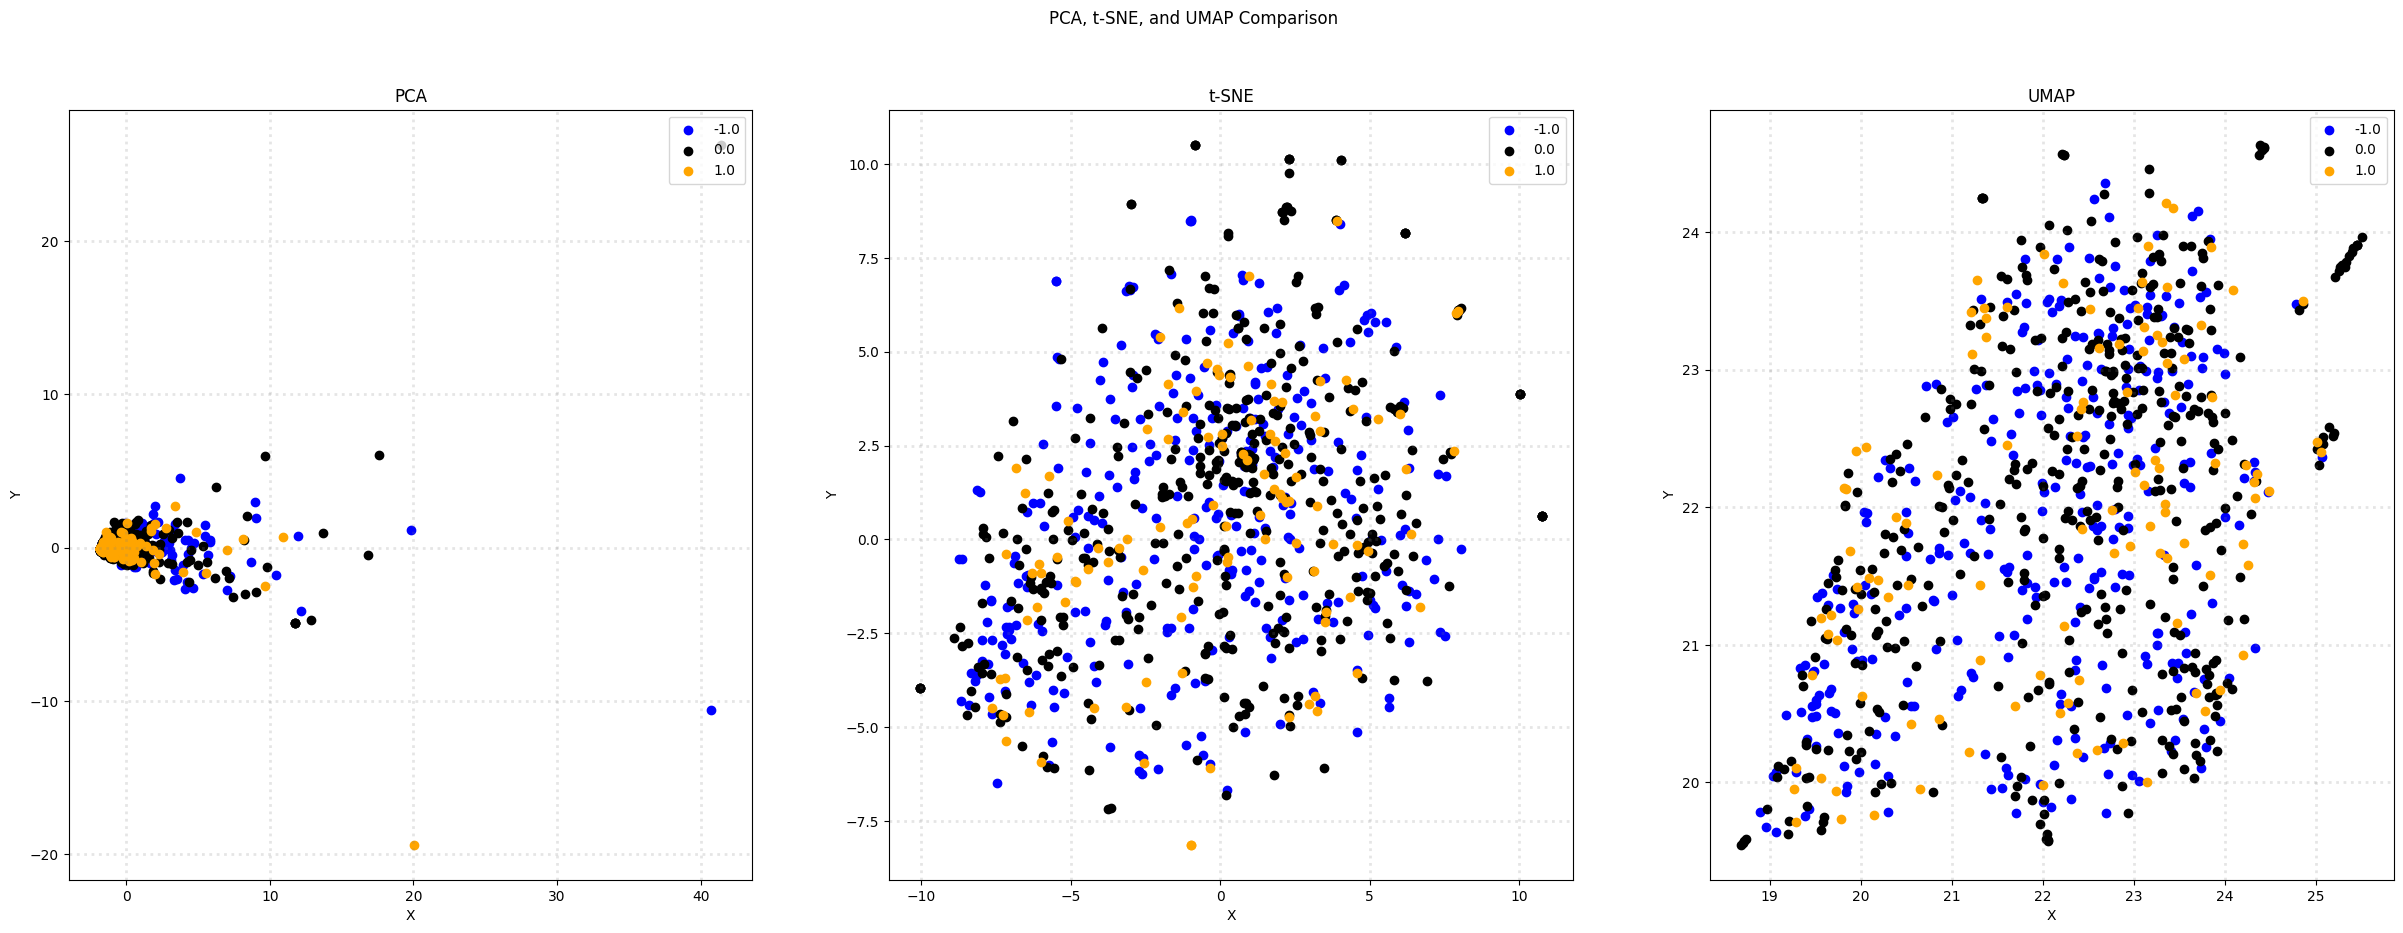

In [41]:
# Plot the results in subplots
col = ['blue', 'black', 'orange']
categories = df_text['label'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df_text['label'] == category].T[0]
        ys = X_reduced[df_text['label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

- 三維

c:\Users\user\OneDrive - NTHU\NTHU\課程資料\1141\資料探勘\Lab1\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


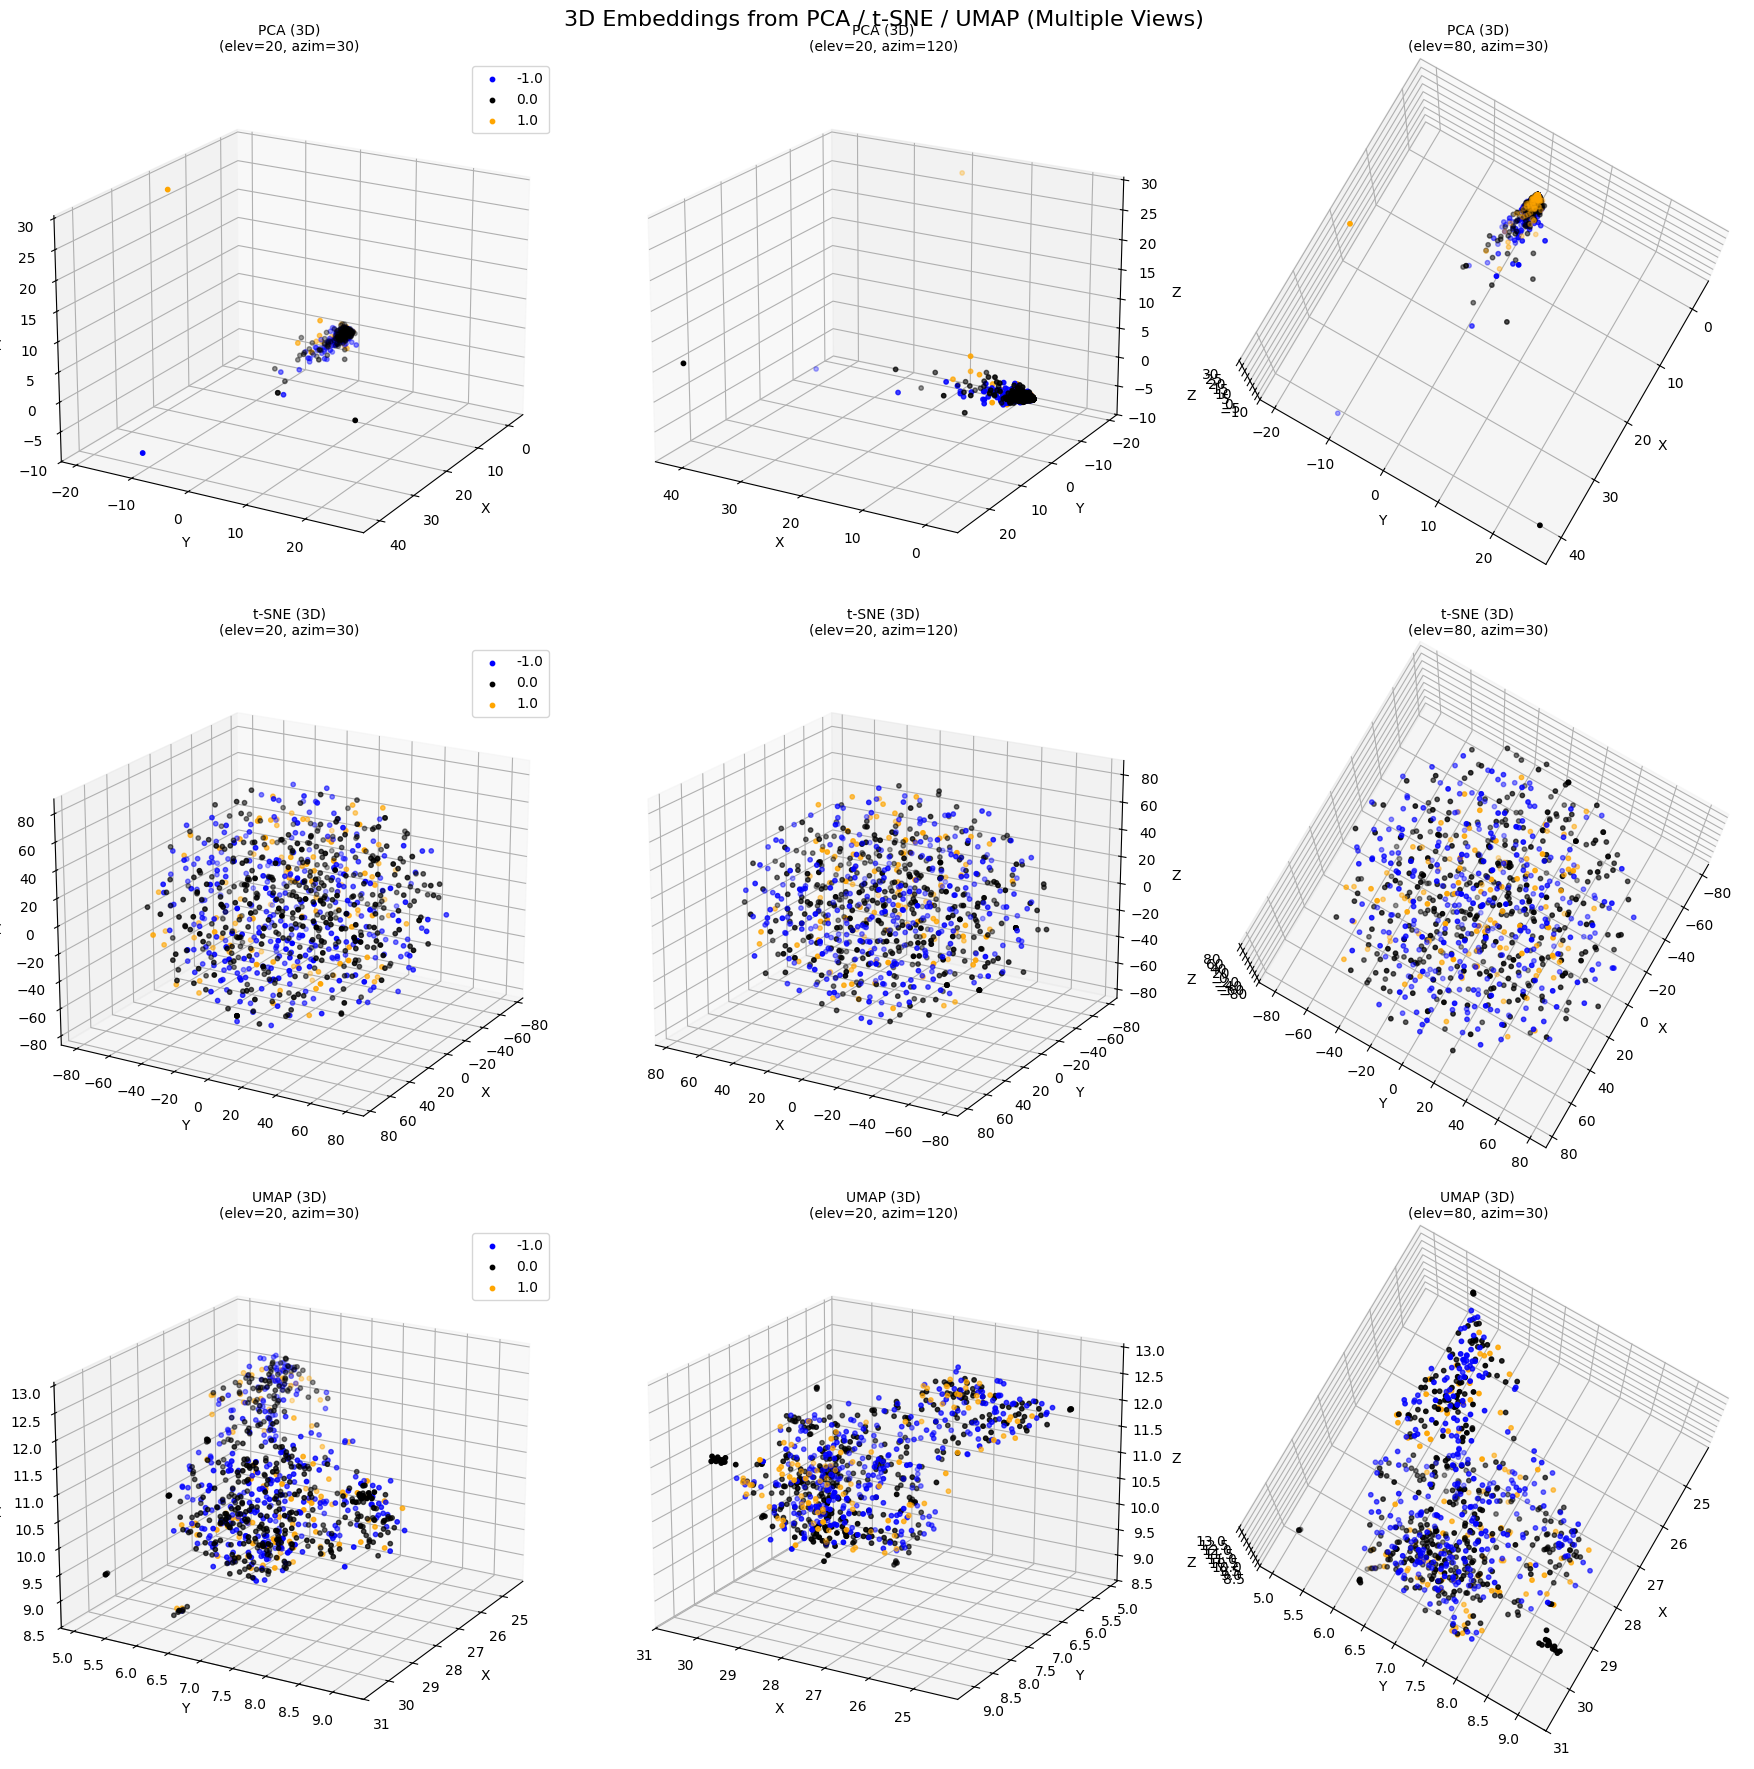

In [42]:
from mpl_toolkits.mplot3d import Axes3D  

# =========== 1. 降到 3 維 ============ #
X_pca_3d  = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3d = TSNE(n_components=3, random_state=0).fit_transform(augmented_df.values)
X_umap_3d = umap.UMAP(n_components=3, random_state=0).fit_transform(augmented_df.values)

# 類別顏色
col = ['blue', 'black', 'orange']
categories = df_text['label'].unique()


# ============= 2.定義一個畫 3D scatter 的小函式 ==================#
def scatter_3d(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        mask = (df_text['label'] == category)

        xs = X_reduced[mask, 0]
        ys = X_reduced[mask, 1]
        zs = X_reduced[mask, 2]

        ax.scatter(xs, ys, zs, c=c, marker='o', label=category, s=10)

    ax.set_title(f'{title}\n(elev={elev}, azim={azim})', fontsize=10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.grid(True)
    ax.view_init(elev=elev, azim=azim)


# ================ 3. 三個視角 ==================#
angles = [
    (20, 30),   # 角度1：斜前上
    (20, 120),  # 角度2：側後方
    (80, 30),   # 角度3：幾乎鳥瞰
]


# ================ 4. 建立 3x3 圖 ==================#
fig = plt.figure(figsize=(18, 18))
fig.suptitle('3D Embeddings from PCA / t-SNE / UMAP (Multiple Views)', fontsize=16)

# row 0: PCA
for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    scatter_3d(ax, X_pca_3d, 'PCA (3D)', elev, azim)
    if i == 0:
        ax.legend(loc='upper right')

# row 1: t-SNE
for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(3, 3, 3 + i+1, projection='3d')  # 3 + i+1 -> positions 4,5,6
    scatter_3d(ax, X_tsne_3d, 't-SNE (3D)', elev, azim)
    if i == 0:
        ax.legend(loc='upper right')

# row 2: UMAP
for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(3, 3, 6 + i+1, projection='3d')  # 6 + i+1 -> positions 7,8,9
    scatter_3d(ax, X_umap_3d, 'UMAP (3D)', elev, azim)
    if i == 0:
        ax.legend(loc='upper right')

# ↓ 調整上方邊界比例 (0~1 之間，越小代表往下壓)
#plt.subplots_adjust(top=0.15)

plt.tight_layout()
plt.show()

## 3. Data Exploration

- 隨機挑選三份 doc，並計算 similarity

In [43]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df_text.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_text.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_text.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [44]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']
['Everyone is talking about the Bond market. But the rates for the bond market are still lower than the rates they had earlier this year.\r\n\r\nWhat is everyone talking about?']


In [45]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [46]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.109109
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.142857
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_16272\452772485.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
C:\Users\user\AppData\Local\Temp\ipykernel_16272\452772485.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
C:\Users\user\AppData\Local\Temp\ipykernel_16272\452772485.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operati

## 4. Data Classification

- Naive Bayes classifier

In [47]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Convert the numerical category labels to text labels
target_names = ['label=-1', 'label=0', 'label=1']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df_text['label'], test_size=0.3, random_state=42)

#X_train
#X_test

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy with Naive Bayes classifier :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy with Naive Bayes classifier : 0.596078431372549

Classification Report:
               precision    recall  f1-score   support

    label=-1     0.6017    0.7245    0.6574        98
     label=0     0.6378    0.6694    0.6532       121
     label=1     0.0000    0.0000    0.0000        36

    accuracy                         0.5961       255
   macro avg     0.4132    0.4646    0.4369       255
weighted avg     0.5339    0.5961    0.5626       255



- Decision Tree

In [48]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df_text['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5176470588235295

Classification Report:
               precision    recall  f1-score   support

    label=-1     0.5250    0.4286    0.4719        98
     label=0     0.5355    0.6860    0.6014       121
     label=1     0.3500    0.1944    0.2500        36

    accuracy                         0.5176       255
   macro avg     0.4702    0.4363    0.4411       255
weighted avg     0.5053    0.5176    0.5020       255



- Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(augmented_df, df_text['label'], test_size=0.3, random_state=42)

clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Logistic Regression Accuracy (TDM):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Logistic Regression Accuracy (TDM): 0.5686274509803921

Classification Report:
               precision    recall  f1-score   support

    label=-1     0.6104    0.4796    0.5371        98
     label=0     0.5796    0.7521    0.6547       121
     label=1     0.3333    0.1944    0.2456        36

    accuracy                         0.5686       255
   macro avg     0.5078    0.4754    0.4791       255
weighted avg     0.5567    0.5686    0.5518       255



## 5. Working on TF-IDF features (third part of Phase 2)

- 資料準備

In [50]:
X_text = df_text['text']
y_label = df_text['label']

In [51]:
X_text

0                                       Calls on retards
1      Stunt as in like why did they even make a big ...
2                      Seeing lots of red in the ticker.
3      Vision Marine Technologies Inc. is rewriting t...
4                               He didn’t say thank you.
                             ...                        
842          Invest now it is going to shoot up tomorrow
843                               Where can I read this?
844    Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...
845    i sold my puts so i expect cheeto to declare w...
846                         ![img](emote|t5_2th52|31224)
Name: text, Length: 847, dtype: object

In [52]:
y_label

0     -1.0
1      0.0
2      0.0
3      1.0
4     -1.0
      ... 
842    1.0
843    0.0
844    0.0
845   -1.0
846    0.0
Name: label, Length: 847, dtype: float64

- 產生 word frequency features (CountVectorizer)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(
    lowercase=True,
    stop_words='english',  # 如果你不想去停用詞就拿掉這行
    min_df=2               # 過濾極少見詞，防止過度稀疏，可調
)

X_counts = count_vect.fit_transform(X_text)
X_counts.shape

(847, 1492)

In [54]:
print(X_counts)

  (np.int32(0), np.int32(194))	1
  (np.int32(0), np.int32(1120))	1
  (np.int32(1), np.int32(789))	1
  (np.int32(1), np.int32(380))	1
  (np.int32(1), np.int32(836))	1
  (np.int32(1), np.int32(150))	1
  (np.int32(1), np.int32(346))	1
  (np.int32(1), np.int32(1242))	1
  (np.int32(1), np.int32(975))	1
  (np.int32(1), np.int32(265))	1
  (np.int32(1), np.int32(1297))	1
  (np.int32(1), np.int32(989))	1
  (np.int32(2), np.int32(1166))	1
  (np.int32(2), np.int32(822))	1
  (np.int32(2), np.int32(1087))	1
  (np.int32(2), np.int32(1330))	1
  (np.int32(3), np.int32(789))	1
  (np.int32(3), np.int32(1429))	3
  (np.int32(3), np.int32(731))	2
  (np.int32(3), np.int32(749))	2
  (np.int32(3), np.int32(438))	3
  (np.int32(3), np.int32(904))	1
  (np.int32(3), np.int32(331))	1
  (np.int32(3), np.int32(429))	1
  (np.int32(3), np.int32(1307))	2
  :	:
  (np.int32(841), np.int32(395))	1
  (np.int32(841), np.int32(140))	1
  (np.int32(841), np.int32(302))	1
  (np.int32(841), np.int32(1254))	1
  (np.int32(841), np

In [55]:
### ----- 製作詞頻表 ----- ###
# textfreq_df = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())
# textfreq_df

- 產生 TF-IDF Features (TfidfVectorizer)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=2
)

X_tfidf = tfidf_vect.fit_transform(X_text)
X_tfidf.shape


(847, 1492)

In [57]:
print(X_tfidf)

  (np.int32(0), np.int32(194))	0.6315623006723557
  (np.int32(0), np.int32(1120))	0.7753251320378057
  (np.int32(1), np.int32(789))	0.21583712947463368
  (np.int32(1), np.int32(380))	0.28195490857997696
  (np.int32(1), np.int32(836))	0.26228502920199115
  (np.int32(1), np.int32(150))	0.30325461433685363
  (np.int32(1), np.int32(346))	0.3247684167932948
  (np.int32(1), np.int32(1242))	0.37884335070116293
  (np.int32(1), np.int32(975))	0.3425376281775045
  (np.int32(1), np.int32(265))	0.29321633427452726
  (np.int32(1), np.int32(1297))	0.3425376281775045
  (np.int32(1), np.int32(989))	0.37884335070116293
  (np.int32(2), np.int32(1166))	0.5077088132981187
  (np.int32(2), np.int32(822))	0.4945577352854718
  (np.int32(2), np.int32(1087))	0.4731173131236649
  (np.int32(2), np.int32(1330))	0.523263237186949
  (np.int32(3), np.int32(789))	0.07847494321321012
  (np.int32(3), np.int32(1429))	0.42825792583842537
  (np.int32(3), np.int32(731))	0.22613878432410026
  (np.int32(3), np.int32(749))	0.1

- 切分訓練/測試資料

In [58]:
from sklearn.model_selection import train_test_split

X_train_counts, X_test_counts, y_train, y_test = train_test_split(
    X_counts,
    y_label,
    test_size=0.3,
    random_state=42,
    stratify=y_label   # 如果類別不平衡，建議分層抽樣
)

X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_tfidf,
    y_label,
    test_size=0.3,
    random_state=42,
    stratify=y_label
)


### 模型 A：Multinomial Naive Bayes on Word Frequency Features (原版)

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb_count = MultinomialNB()
nb_count.fit(X_train_counts, y_train)

y_pred_count = nb_count.predict(X_test_counts)

print("Accuracy with MultinomialNB (Word Frequency):", accuracy_score(y_test, y_pred_count))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred_count, digits=4))


Accuracy with MultinomialNB (Word Frequency): 0.5490196078431373

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.5289    0.6737    0.5926        95
         0.0     0.6429    0.5669    0.6025       127
         1.0     0.1818    0.1212    0.1455        33

    accuracy                         0.5490       255
   macro avg     0.4512    0.4539    0.4469       255
weighted avg     0.5407    0.5490    0.5397       255



### 模型 B：三種 Naive Bayes on TF-IDF features (MultinomialNB 表現還是最好)

- B1 : MultinomialNB (原本的版本)

In [60]:
# MultinomialNB
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("Accuracy with MultinomialNB (TF-IDF features):", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred_tfidf, digits=4))

Accuracy with MultinomialNB (TF-IDF features): 0.5843137254901961

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.5823    0.4842    0.5287        95
         0.0     0.5852    0.8110    0.6799       127
         1.0     0.0000    0.0000    0.0000        33

    accuracy                         0.5843       255
   macro avg     0.3892    0.4317    0.4029       255
weighted avg     0.5084    0.5843    0.5356       255



c:\Users\user\OneDrive - NTHU\NTHU\課程資料\1141\資料探勘\Lab1\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\OneDrive - NTHU\NTHU\課程資料\1141\資料探勘\Lab1\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\OneDrive - NTHU\NTHU\課程資料\1141\資料探勘\Lab1\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

- B2 : BernoulliNB

In [61]:
# BernoulliNB on TF-IDF features
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, classification_report

# 將 TF-IDF 特徵轉為 0/1（有詞則為1）
binarizer = Binarizer(threshold=0.0)
X_train_bin = binarizer.fit_transform(X_train_tfidf)
X_test_bin = binarizer.transform(X_test_tfidf)

# 建立並訓練 BernoulliNB 模型
nb_bern = BernoulliNB()
nb_bern.fit(X_train_bin, y_train)

# 預測
y_pred_bern = nb_bern.predict(X_test_bin)

# 評估
print("Accuracy with BernoulliNB (Binarized TF-IDF features):", accuracy_score(y_test, y_pred_bern))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred_bern, digits=4))


Accuracy with BernoulliNB (Binarized TF-IDF features): 0.5803921568627451

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.6081    0.4737    0.5325        95
         0.0     0.5896    0.8031    0.6800       127
         1.0     0.1250    0.0303    0.0488        33

    accuracy                         0.5804       255
   macro avg     0.4409    0.4357    0.4204       255
weighted avg     0.5364    0.5804    0.5434       255



- B3 : GaussianNB

In [62]:
# GaussianNB on TF-IDF features
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# 將 sparse matrix 轉成 dense (GaussianNB 不支援 sparse)
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# 建立並訓練 GaussianNB 模型
nb_gauss = GaussianNB()
nb_gauss.fit(X_train_dense, y_train)

# 預測
y_pred_gauss = nb_gauss.predict(X_test_dense)

# 評估
print("Accuracy with GaussianNB (TF-IDF features):", accuracy_score(y_test, y_pred_gauss))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred_gauss, digits=4))


Accuracy with GaussianNB (TF-IDF features): 0.47058823529411764

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.5149    0.5474    0.5306        95
         0.0     0.5688    0.4882    0.5254       127
         1.0     0.1333    0.1818    0.1538        33

    accuracy                         0.4706       255
   macro avg     0.4057    0.4058    0.4033       255
weighted avg     0.4924    0.4706    0.4793       255



### 模型 C : MultinomialNB on TF-IDF features with origin/augmented dataset 的準確率

In [63]:
tfidf_vect = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=2
)

X_tfidf = tfidf_vect.fit_transform(X_text)
X_tfidf

<847x1492 sparse matrix of type '<class 'numpy.float64'>'
	with 7293 stored elements in Compressed Sparse Row format>

In [64]:
from scipy.sparse import hstack, csr_matrix
# === Step 2. 產生 pattern-based binary features (augmentation part) ===
# 先建立 token set，方便判斷 pattern 是否出現
df_text = df_text.copy()  # 保險起見
df_text['tokenized_text'] = df_text['text'].str.split().apply(set)

patterns = final_pattern_df['Patterns'].tolist()  # 這些是你保留下來的獨特 pattern

# 建一個 (n_docs x n_patterns) 的 0/1 矩陣 (dense 暫存)
pattern_feature_mat = np.zeros((len(df_text), len(patterns)), dtype=int)

for col_idx, pattern in enumerate(patterns):
    pattern_words = set(pattern.split())
    # 對每一個文件決定該 pattern 是否存在
    pattern_feature_mat[:, col_idx] = df_text['tokenized_text'].apply(
        lambda token_set: 1 if pattern_words.issubset(token_set) else 0
    ).to_numpy()

# 轉成 sparse，因為等一下要跟 X_tfidf (sparse) 合併
pattern_feature_sparse = csr_matrix(pattern_feature_mat)

# === Step 3. 把 TF-IDF 矩陣 + pattern 矩陣 串在一起 ===
X_tfidf_aug = hstack([X_tfidf, pattern_feature_sparse], format='csr')

# === Step 4. 切訓練/測試 (注意同時切 label) ===
X_train_base, X_test_base, y_train, y_test = train_test_split(
    X_tfidf,
    y_label,
    test_size=0.3,
    random_state=42,
    stratify=y_label
)

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    X_tfidf_aug,
    y_label,
    test_size=0.3,
    random_state=42,
    stratify=y_label
)

# === Step 5. 訓練 baseline: 純 TF-IDF ===
nb_base = MultinomialNB()  # 或 BernoulliNB() 若你想測 presence model
nb_base.fit(X_train_base, y_train)
y_pred_base = nb_base.predict(X_test_base)

print("Baseline (TF-IDF only) with MultinomialNB accuracy:",
      accuracy_score(y_test, y_pred_base))
print("\nClassification Report (TF-IDF only):\n",
      classification_report(y_test, y_pred_base, digits=4))

# === Step 6. 訓練 augmented: TF-IDF + pattern flags ===
nb_aug = MultinomialNB()  # 保持同一模型公平比較
nb_aug.fit(X_train_aug, y_train_aug)
y_pred_aug = nb_aug.predict(X_test_aug)

print('=====================================================================')
print("Augmented (TF-IDF + pattern flags) with MultinomialNB accuracy:",
      accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report (Augmented TF-IDF):\n",
      classification_report(y_test_aug, y_pred_aug, digits=4))


Baseline (TF-IDF only) with MultinomialNB accuracy: 0.5843137254901961

Classification Report (TF-IDF only):
               precision    recall  f1-score   support

        -1.0     0.5823    0.4842    0.5287        95
         0.0     0.5852    0.8110    0.6799       127
         1.0     0.0000    0.0000    0.0000        33

    accuracy                         0.5843       255
   macro avg     0.3892    0.4317    0.4029       255
weighted avg     0.5084    0.5843    0.5356       255

Augmented (TF-IDF + pattern flags) with MultinomialNB accuracy: 0.5882352941176471

Classification Report (Augmented TF-IDF):
               precision    recall  f1-score   support

        -1.0     0.5843    0.5474    0.5652        95
         0.0     0.5904    0.7717    0.6689       127
         1.0     0.0000    0.0000    0.0000        33

    accuracy                         0.5882       255
   macro avg     0.3915    0.4397    0.4114       255
weighted avg     0.5117    0.5882    0.5437       255



c:\Users\user\OneDrive - NTHU\NTHU\課程資料\1141\資料探勘\Lab1\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\OneDrive - NTHU\NTHU\課程資料\1141\資料探勘\Lab1\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\OneDrive - NTHU\NTHU\課程資料\1141\資料探勘\Lab1\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

### 實驗結果分析

- TF-IDF 特徵在不考慮 augmented dataset 的情況下優於 word frequency feature 的處理 (0.5843137254901961 > 0.5490196078431373)，顯示詞權重調整能提升模型的語意辨識力。
- 而當進一步導入 pattern-based augmentation 時，模型準確率略有上升 (0.5882352941176471 > 0.5843137254901961)，顯示結合詞頻資訊與高支持度語言片語的混合特徵能微幅強化分類穩定度
- 在 NB 模型選擇上，MultinomialNB 仍為文字任務中最合適的 Naive Bayes 變體，GaussianNB 因資料分佈不符常態假設而導致表現下滑。

## 6. Something can be improved (fourth of phase-2)

1. Pattern Mining 的效率提升 : 目前在 Augmentation 用 Frequent Pattern Mining 時需要多次掃描語料庫（support counting），產生後還要用 issubset() 比對，會造成特徵冗餘與記憶體負擔。可以在 pattern feature selection 階段加入閾值，例如僅保留與標籤有高 mutual information (MI) 或 chi-square 分數的 pattern，減少搜尋空間降低運算負擔。
2. 降維 : 目前的降維直接對原始詞頻矩陣（dense 化後的 bag-of-words）做 PCA、t-SNE、UMAP，計算成本高，且對稀疏高維文本並不一定能得到語意清晰的聚類。可以先以 TF-IDF 表示文本，再使用 TruncatedSVD 將維度降到中階（例如 50 維），去除掉稀有雜訊詞與共線冗餘，再把這個低維語義空間交給 t-SNE 或 UMAP 繪製 2D。這樣可以同時降低運算量，並讓可視化更能反映真實類別結構。
3. 更精簡的 pipeline data mining 流程設計: 以 sklearn.pipeline.Pipeline 串接清理、向量化、模型訓練步驟；亦可用於未來若有加入交叉驗證與快速切換不同向量化器（Count vs. TF-IDF vs. N-gram） 等目的。